## 선형 회귀 (Linear Regression)

- 입력(x)과 출력(y) 간의 선형 관계(직선)를 모델링하는 알고리즘
  - 목표 : 데이터의 오차를 최소화하는 '최적의 직선'을 찾는 것
  - 단순 선형 회귀 : 특징(독립 변수)이 1개일 때 (y = ax + b)
  - 다중 선형 회귀 : 특징(독립 변수)이 2개 이상일 때 (y = a1x1 + a2x2 + ... + b)
- 직관적이고 해석이 쉬운 편이며, 예측 값이 연속적인 숫자일 때 사용 (ex. 집값, 온도, 점수, ...)

### 용어 정리
- X (입력 데이터) = 특징 (Feature) = 독립변수 : 모델이 결과를 예측하기 위해 사용하는 데이터. 모델에 들어가는 재료.
- y (출력 데이터) = 목표 (Target) = 종속변수 : 모델이 예측해야 하는 '정답' 정보. X에 종속되어 결정됨.

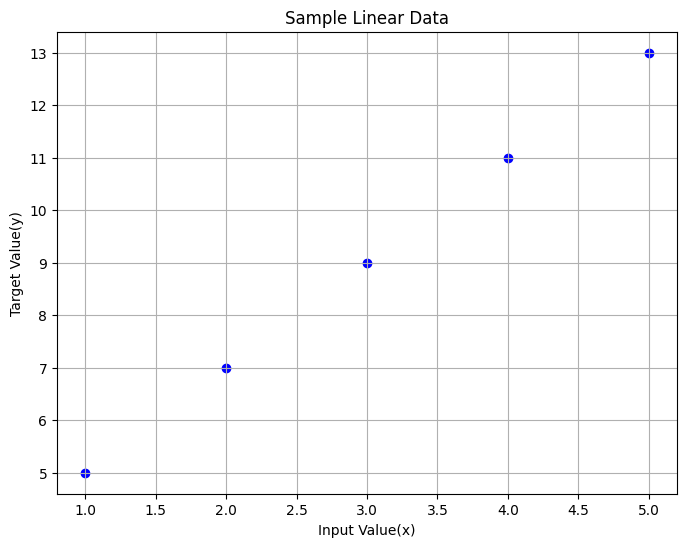

In [ ]:
import numpy as np

# 샘플 데이터
x = np.array([[1], [2], [3], [4], [5]]) # Feature(특징)가 1개인 데이터셋
y = np.array([5, 7, 9, 11, 13])         # Target(목표값)
# => 입력(x)값이 1씩 증가될 때마다 목표(y)값이 2씩 증가됨 => 완벽한 선형 관계
#    데이터를 기준으로 기울기가 2, 절편이 3이 됨을 알 수 있음.

# x, y 데이터로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# 산점도 그래프로 표시
plt.scatter(x, y, color='blue')

plt.title('Sample Linear Data')
plt.xlabel('Input Value(x)')
plt.ylabel('Target Value(y)')
plt.grid(True)
plt.show()

 기울기(계수) : 2.0
 절편 : 3.0


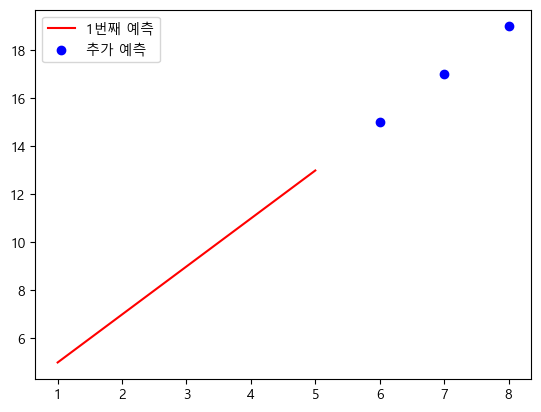

In [11]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()    # 모델 생성

model.fit(x, y)               # 학습

# 기울기, 절편 확인
# 기울기(회귀계수)
# model.coef_[0]
print(f' 기울기(계수) : {model.coef_[0]}')
# 절편
# model.intercept_
print(f' 절편 : {model.intercept_}')
# => y = 2x + 3

# -----

plt.rc('font', family='Malgun Gothic')

# 예측
y_pred = model.predict(x)

plt.plot(x, y_pred, color='red', label='1번째 예측')

x_test = np.array([[6], [7], [8]])
y_test_pred = model.predict(x_test)

plt.scatter(x_test, y_test_pred, color='blue', label='추가 예측')

plt.legend()

---

In [ ]:
# 당뇨병 데이터셋으로 선형 회귀 연습

# 데이터 로드